# EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering


### Index No. : 190696U

### Name : Wijegunawardana C.H.W.

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

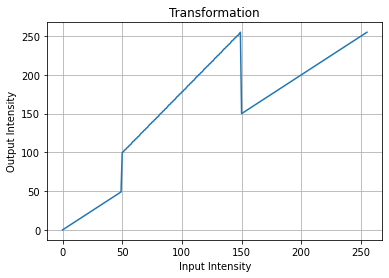

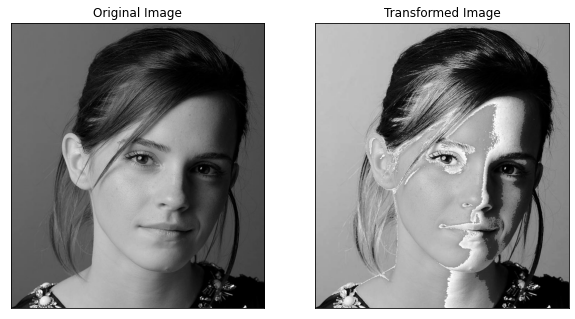

In [3]:
# Import Image
img1 = cv.imread('Images/emma_gray.jpg', cv.IMREAD_ANYCOLOR)
assert img1 is not None

# Generate the transformation
transform = np.arange(0, 256, dtype = np.uint8)
transform[:50] = np.linspace(0, 50, 50, endpoint = False)
transform[50:150] = np.linspace(100, 255, 100, endpoint = True)
transform[150:256] = np.linspace(150, 255, 106, endpoint = True)

# Plot the transformation
plt.plot(transform)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.title("Transformation")

# Apply the transformation to the image
trans_img1 = cv.LUT(img1,transform)

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(trans_img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Transformed Image")
for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

### Observation

By this transformation, the pixels that have a gray-scale value between 50-150 are emphasized by increasing their intensity compared to other pixels. Therefore, those pixels with gray-scale value between 50-150 have become more white in the transformed image.

2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

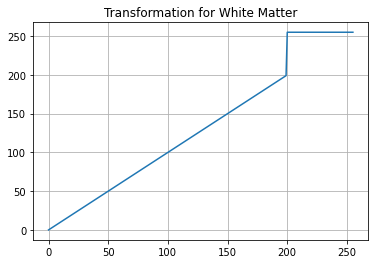

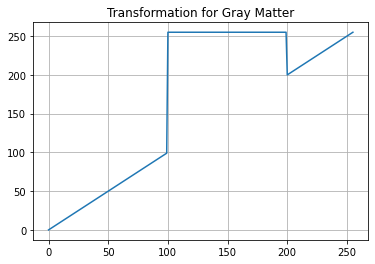

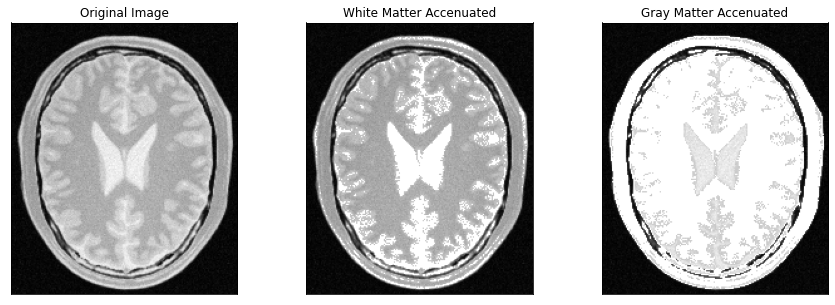

In [4]:
# Import the image
img2 = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img2 is not None

# Transformation for white matter
transform_white = np.arange(0, 256, dtype = np.uint8)
transform_white[:200] = np.linspace(0, 200, 200, endpoint = False)
transform_white[200:256] = 255

# Plot the transformation
figure, axis = plt.subplots()
axis.plot(transform_white)
axis.grid(True)
axis.set_title("Transformation for White Matter")

# Transformation for gray matter
transform_gray = np.arange(0, 256, dtype = np.uint8)
transform_gray[:100] = np.linspace(0, 100, 100, endpoint = False)
transform_gray[100:200] = 255 #np.linspace(100, 255, 130, endpoint = True)
transform_gray[200:256] = np.linspace(200, 255, 56, endpoint = True)

# Plot the transformation
figure, axis = plt.subplots()
axis.plot(transform_gray)
axis.grid(True)
axis.set_title("Transformation for Gray Matter")

# Apply the transformation to the image
white_img2 = cv.LUT(img2,transform_white)
gray_img2 = cv.LUT(img2,transform_gray)

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(img2, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(white_img2, cmap = 'gray')
ax[1].set_title("White Matter Accenuated")
ax[2].imshow(gray_img2, cmap = 'gray')
ax[2].set_title("Gray Matter Accenuated")
for i in range(3):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

To accenuate the white matter, the transformation is designed such that the output will have absolute white in near white pixels for better visualization. The near white grayscale range is selected as 200-255.

To accenuate the gray matter, the transformation is designed such that the output will have absolute white in gray pixels for better visualization. The gray grayscale range is selected as 50-200.

In both cases, the undesirable gray levels are remained in their original grayscale level.

3. Consider the image shown in Fig. 3.

(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗ color space and state the γ value.

(b) Show the histograms of the original and corrected images

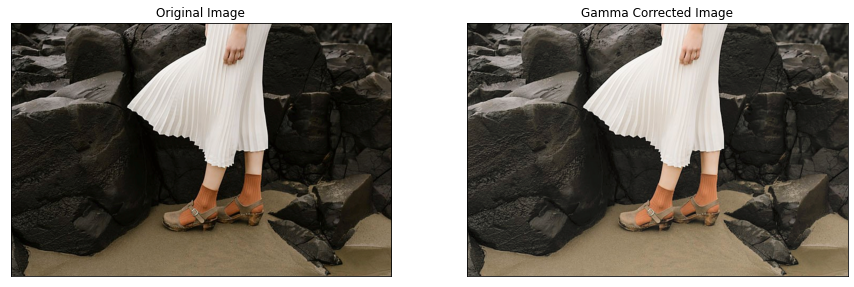

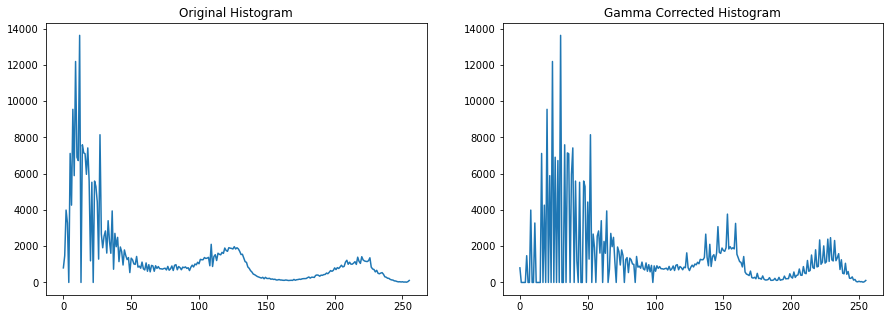

In [39]:
# Import the image
img3 = cv.imread('Images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img3 is not None

# Convert to L*a*b* color space
img3 = cv.cvtColor(img3, cv.COLOR_BGR2Lab)

gamma = 0.7
# Apply gamma correction
transform = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
L_field = cv.LUT(img3[:,:,0],transform).reshape(480,720,1) # Applying Gamma correction to only the L field
np.shape(L_field)
corrected = np.concatenate([L_field,img3[:,:,1:]],-1) # Reconstruct the image

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(cv.cvtColor(img3, cv.COLOR_Lab2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(corrected, cv.COLOR_Lab2RGB))
ax[1].set_title("Gamma Corrected Image")
for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

fig,ax = plt.subplots(1,2,figsize = (15,5))
# Original Histogram
histogram_ori = cv.calcHist([img3],[0],None,[256],[0,256])
ax[0].plot(histogram_ori)
ax[0].set_title("Original Histogram")

# Corrected Histogram
histogram_cor = cv.calcHist([corrected],[0],None,[256],[0,256])
ax[1].plot(histogram_cor)
ax[1].set_title("Gamma Corrected Histogram")
plt.show()

Gamma Value = 0.7